In [ ]:
#### Extracting MFCC's For every audio file
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import librosa
from glob import glob
from google.colab import drive
drive.mount('/content/gdrive')

audio_dataset_path='/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/'
data=pd.read_csv('/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/patient_diagnosis.csv')

Mounted at /content/gdrive


In [ ]:
aug_diagnosis = pd.read_csv('/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/augmented_features_df_2.csv')
aug_diagnosis.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Disease_Id
0,-477.40340,67.018900,54.495525,39.221470,26.022156,17.418203,13.355597,12.385004,12.951959,13.972430,...,0.905445,1.828418,2.753478,3.402586,3.664344,3.583195,3.262911,2.790702,2.233784,0
1,-456.24530,86.772210,66.549390,43.219105,24.172537,11.904998,5.613225,4.082992,6.394209,10.865974,...,1.224814,1.710074,2.220140,2.707141,3.132681,3.371336,3.301630,2.959306,2.530368,0
2,-528.42523,104.517365,69.907585,42.572124,31.213380,27.490576,22.207005,16.551100,15.276700,16.680300,...,1.706840,1.291596,1.235050,1.438685,1.699789,1.756031,1.701586,1.754641,1.924429,2
3,-255.64062,18.096684,20.870960,20.051090,18.711037,17.050531,15.497256,14.303628,12.963915,11.681453,...,1.793608,1.637177,1.725999,1.765679,1.852187,1.919738,1.736541,1.801463,1.871822,2
4,-529.42970,104.600890,69.621445,42.210793,31.043596,27.443840,22.173733,16.461601,15.227236,16.656986,...,1.697542,1.272352,1.194061,1.393959,1.668183,1.744319,1.685940,1.729068,1.891513,2


In [ ]:
aug_diagnosis['Disease_Id'].value_counts()

1    560
0    551
3    544
5    520
2    506
4    481
Name: Disease_Id, dtype: int64

In [ ]:
data = aug_diagnosis.values

In [ ]:
data = np.delete(data, np.where((data[:, -1] == 6) | (data[:, -1] == 7))[0], axis=0)

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
from collections import Counter
counter = Counter(y)

In [ ]:
dict1 = {0:"COPD", 1:"Healthy", 2:"URTI", 3:"Bronchiectasis", 4:"Pneumoina", 5:"Bronchiolitis"}

In [ ]:
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))

In [ ]:
y.shape

(3162, 6)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2529, 40)
(633, 40)
(2529, 6)
(633, 6)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
num_labels=y.shape[1]
num_labels

6

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Activation, MaxPooling1D, Dropout
from tensorflow.keras.utils import plot_model,to_categorical
from timeit import default_timer as timer
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta
from sklearn import metrics

In [ ]:
model = Sequential()


model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(40,1)))
# model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(64, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(40, 1)))

# model.add(Conv1D(128, kernel_size=5, activation='relu'))
# model.add(MaxPooling1D(2))

# model.add(Conv1D(256, kernel_size=5, activation='relu'))

# model.add(Dropout(0.3))
# model.add(Flatten())

# model.add(Dense(512, activation='relu'))
# model.add(Dense(6, activation='softmax'))


model.add(Dense(num_labels))
model.add(Activation('softmax'))

# opt = tf.optimizers.Adam(learning_rate=0.99)
# model.compile(loss='categorical_crossentropy', optimizer=opt)

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_23 (Conv1D)          (None, 36, 64)            384       
                                                                 
 dropout_45 (Dropout)        (None, 36, 64)            0         
                                                                 
 conv1d_24 (Conv1D)          (None, 32, 64)            20544     
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 16, 64)           0         
 g1D)                                                            
                                                                 
 dropout_46 (Dropout)        (None, 16, 64)            0         
                                                                 
 conv1d_25 (Conv1D)          (None, 12, 64)            20544     
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=16,callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/150
159/159 [==============================] - ETA: 0s - loss: 2.0044 - accuracy: 0.1657
Epoch 1: val_loss improved from inf to 1.79215, saving model to saved_models/audio_classification.hdf5
159/159 [==============================] - 9s 36ms/step - loss: 2.0044 - accuracy: 0.1657 - val_loss: 1.7922 - val_accuracy: 0.1675
Epoch 2/150
157/159 [============================>.] - ETA: 0s - loss: 1.8067 - accuracy: 0.1720
Epoch 2: val_loss did not improve from 1.79215
159/159 [==============================] - 3s 21ms/step - loss: 1.8065 - accuracy: 0.1712 - val_loss: 1.7923 - val_accuracy: 0.1675
Epoch 3/150
156/159 [============================>.] - ETA: 0s - loss: 1.8006 - accuracy: 0.1675
Epoch 3: val_loss did not improve from 1.79215
159/159 [==============================] - 2s 11ms/step - loss: 1.8007 - accuracy: 0.1681 - val_loss: 1.7924 - val_accuracy: 0.1864
Epoch 4/150
157/159 [============================>.] - ETA: 0s - loss: 1.7936 - accuracy: 0.1863
Epoch 4: val_loss d

In [ ]:
model.save("model.h5")

In [ ]:
np.save('history.npy',history.history)

In [ ]:
model1 = tf.keras.models.load_model('model.h5')

In [ ]:
history = np.load('history.npy',allow_pickle=True)

In [ ]:
# Evaluating the model on the training and testing set
score_1 = model1.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score_1[1])

score_2 = model1.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score_2[1])

Training Accuracy:  0.8829576969146729
Testing Accuracy:  0.8894155025482178


In [ ]:
print("Training loss: ", score_1[0])
print("Testing loss: ", score_2[0])

Training loss:  0.3769869804382324
Testing loss:  0.3759196400642395


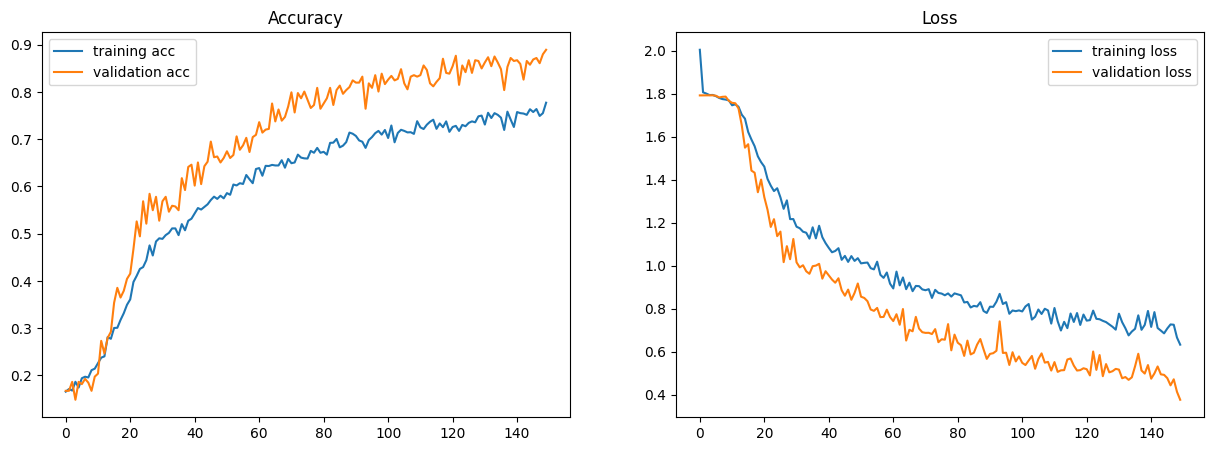

In [ ]:
# Plot accuracy and loss graphs
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(history.item()['accuracy'], label = 'training acc')
plt.plot(history.item()['val_accuracy'], label = 'validation acc')
plt.legend()

plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(history.item()['loss'], label = 'training loss')
plt.plot(history.item()['val_loss'], label = 'validation loss')
plt.legend()

20/20 [==============================] - 0s 6ms/step
                precision    recall  f1-score   support

          COPD       1.00      0.91      0.95       118
       Healthy       0.75      0.90      0.82       106
          URTI       1.00      0.68      0.81       114
Bronchiectasis       0.86      1.00      0.93        93
     Pneumoina       0.88      0.98      0.93       108
 Bronchiolitis       0.90      0.89      0.90        94

      accuracy                           0.89       633
     macro avg       0.90      0.89      0.89       633
  weighted avg       0.90      0.89      0.89       633



<Axes: xlabel='Predicted', ylabel='Actual'>

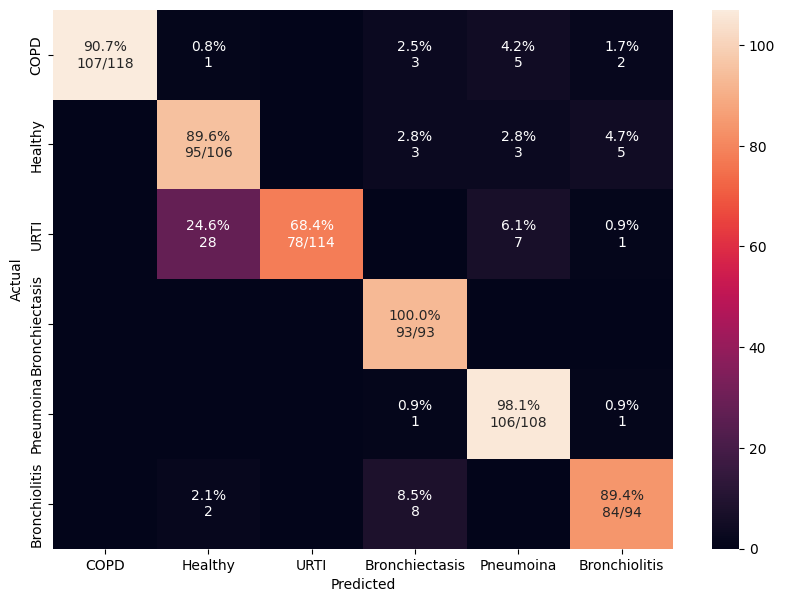

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
matrix_index = ["COPD", "Healthy", "URTI", "Bronchiectasis", "Pneumoina", "Bronchiolitis"]

preds = model1.predict(X_test)
classpreds = np.argmax(preds, axis=1) # predicted classes
y_testclass = np.argmax(y_test, axis=1) # true classes

cm = confusion_matrix(y_testclass, classpreds)
print(classification_report(y_testclass, classpreds, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sn.heatmap(df_cm, annot=annot, fmt='')

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
count = []
for i in counter.keys():
  count.append(int(i))
count.sort()
result=[]
for label in count:
  precision,recall,f_score,support = precision_recall_fscore_support(np.array(y_testclass) == label,np.array(classpreds) == label)
  result.append([dict1[label],recall[0],recall[1],recall[1],precision[1],f_score[1],support[1]])
df = pd.DataFrame(result,columns=["label","Specificity","Sensitivity","Recall","Precision","f_score","support"])
df

,label,Specificity,Sensitivity,Recall,Precision,f_score,support
0,COPD,1.000000,0.906780,0.906780,1.000000,0.951111,118
1,Healthy,0.941176,0.896226,0.896226,0.753968,0.818966,106
2,URTI,1.000000,0.684211,0.684211,1.000000,0.812500,114
3,Bronchiectasis,0.972222,1.000000,1.000000,0.861111,0.925373,93
4,Pneumoina,0.971429,0.981481,0.981481,0.876033,0.925764,108
5,Bronchiolitis,0.983302,0.893617,0.893617,0.903226,0.898396,94
